In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import string
from alias_period import tidal_aliasing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:

constituent = ["2N2","EP2","J1","L2","M3","M4","MF","MI2","MKS","MM","MN4","MS4","MSF","MSQ"
            ,"MTM","N4","NI2","R2","S1","SA","SSA","T2",'M2','S2','N2','K2','K1','O1','P1','Q1']

catfile = "data/catHW95.dat"

alias_j1 = tidal_aliasing(constituent,catfile,'jason-1',output='array')
alias_en = tidal_aliasing(constituent,catfile,'envisat',output='array')


Cycle length = 9.9156 days
Cycle length = 35.0 days


In [3]:
Rc_j = np.reshape((np.repeat(alias_j1,len(alias_j1))), (len(alias_j1),len(alias_j1))).T
Ry_J = np.zeros((np.shape(Rc_j)))

Rc_e = np.reshape((np.repeat(alias_en,len(alias_en))), (len(alias_en),len(alias_en))).T
Ry_E = np.zeros((np.shape(Rc_e)))

for k in range(len(Ry_J[0])):
    Ry_J[:,k] = 1/np.abs(1/Rc_j[:,k] - 1/Rc_j[k])
    Ry_E[:,k] = 1/np.abs(1/Rc_e[:,k] - 1/Rc_e[k])


<ipython-input-3-27da6e2053f6>:8: RuntimeWarning: divide by zero encountered in true_divide
  Ry_J[:,k] = 1/np.abs(1/Rc_j[:,k] - 1/Rc_j[k])
<ipython-input-3-27da6e2053f6>:9: RuntimeWarning: divide by zero encountered in true_divide
  Ry_E[:,k] = 1/np.abs(1/Rc_e[:,k] - 1/Rc_e[k])


In [4]:
Ry_E = Ry_E.round(decimals=0)
Ry_J = Ry_J.round(decimals=0)

## Plotting Aliasing Periods

In [5]:
constituent = ["2N2","EP2","J1","L2","M3","M4","MF","MI2","MKS","MM","MN4","MS4","MSF","MSQ"
            ,"MTM","N4","NI2","R2","S1","SA","SSA","T2",'M2','S2','N2','K2','K1','O1','P1','Q1']

catfile = "data/catHW95.dat"

ja = tidal_aliasing(constituent,catfile,'jason-1',output='dataframe')
en = tidal_aliasing(constituent,catfile,'envisat',output='dataframe')

Cycle length = 9.9156 days
Alias periods output into dataframe
Cycle length = 35.0 days
Alias periods output into dataframe


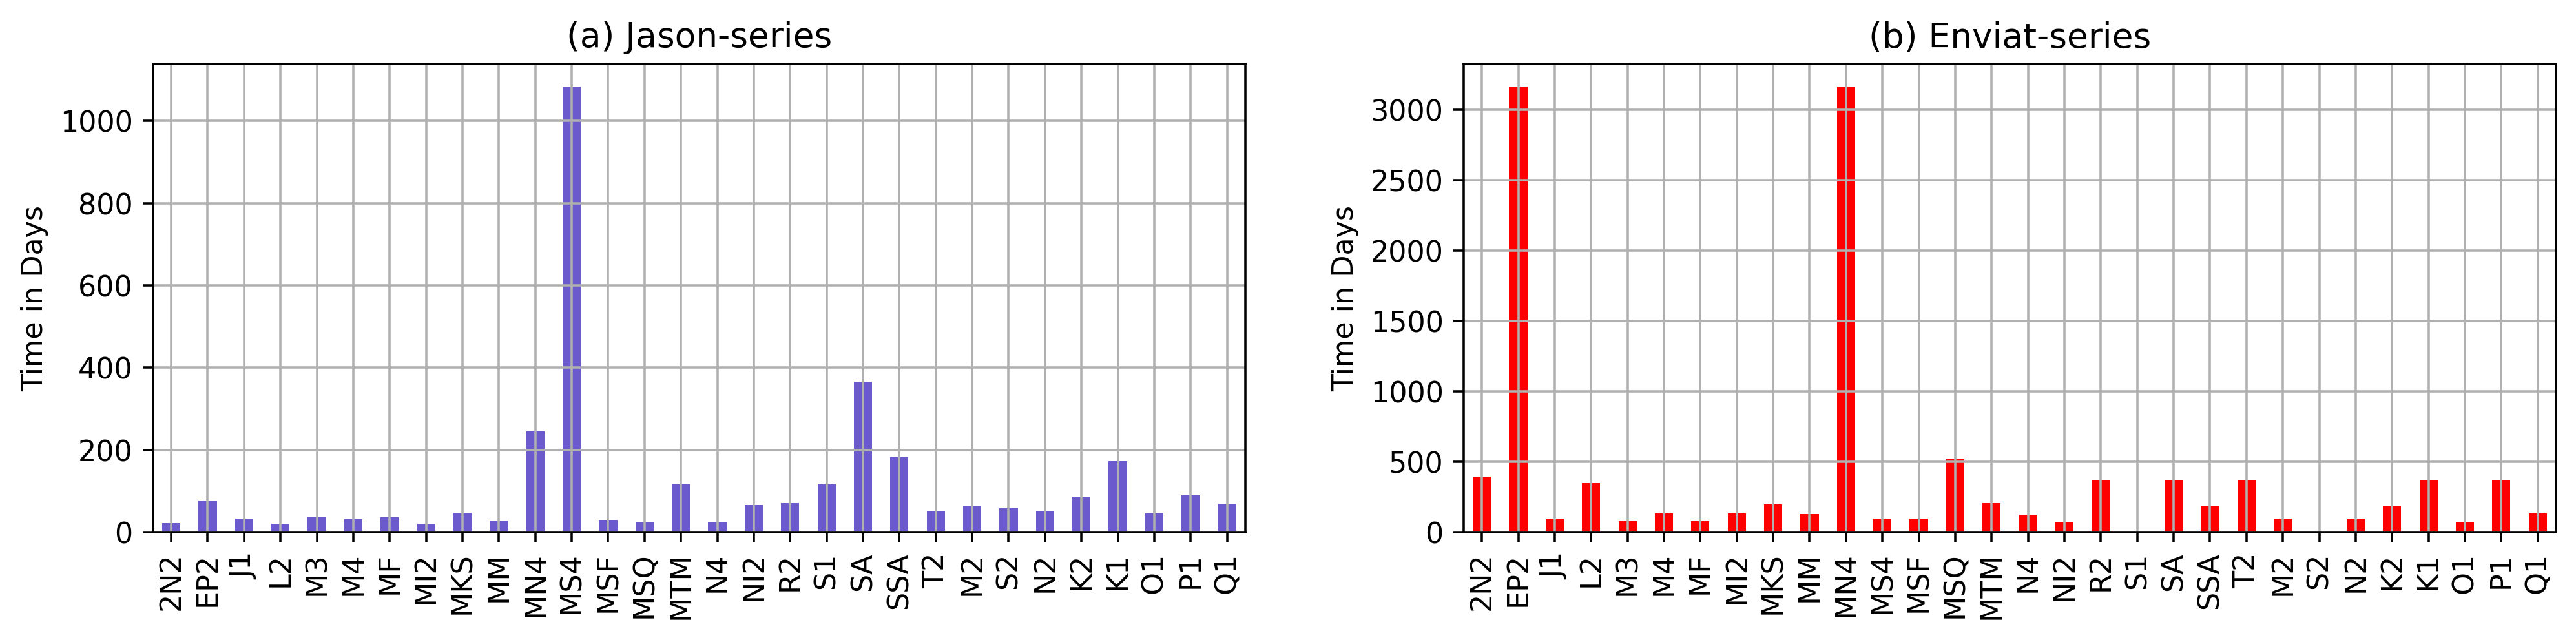

Figure. The alias period for all the tidal constituents available from FES2014b.


In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2,dpi=320,figsize=(15,3))

ja.plot(kind='bar',ax=axes[0],legend=False,ylabel='Time in Days',title='(a) Jason-series' ,color='slateblue',
       grid=True)
en.plot(kind='bar',ax=axes[1],legend=False,ylabel='Time in Days',title='(b) Enviat-series',color='red',
       grid=True)

plt.show()
print('Figure. The alias period for all the tidal constituents available from FES2014b.')

## Plotting Rayleigh Coefficient

<ipython-input-10-d91c044ce9c6>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(d, dtype=np.bool)


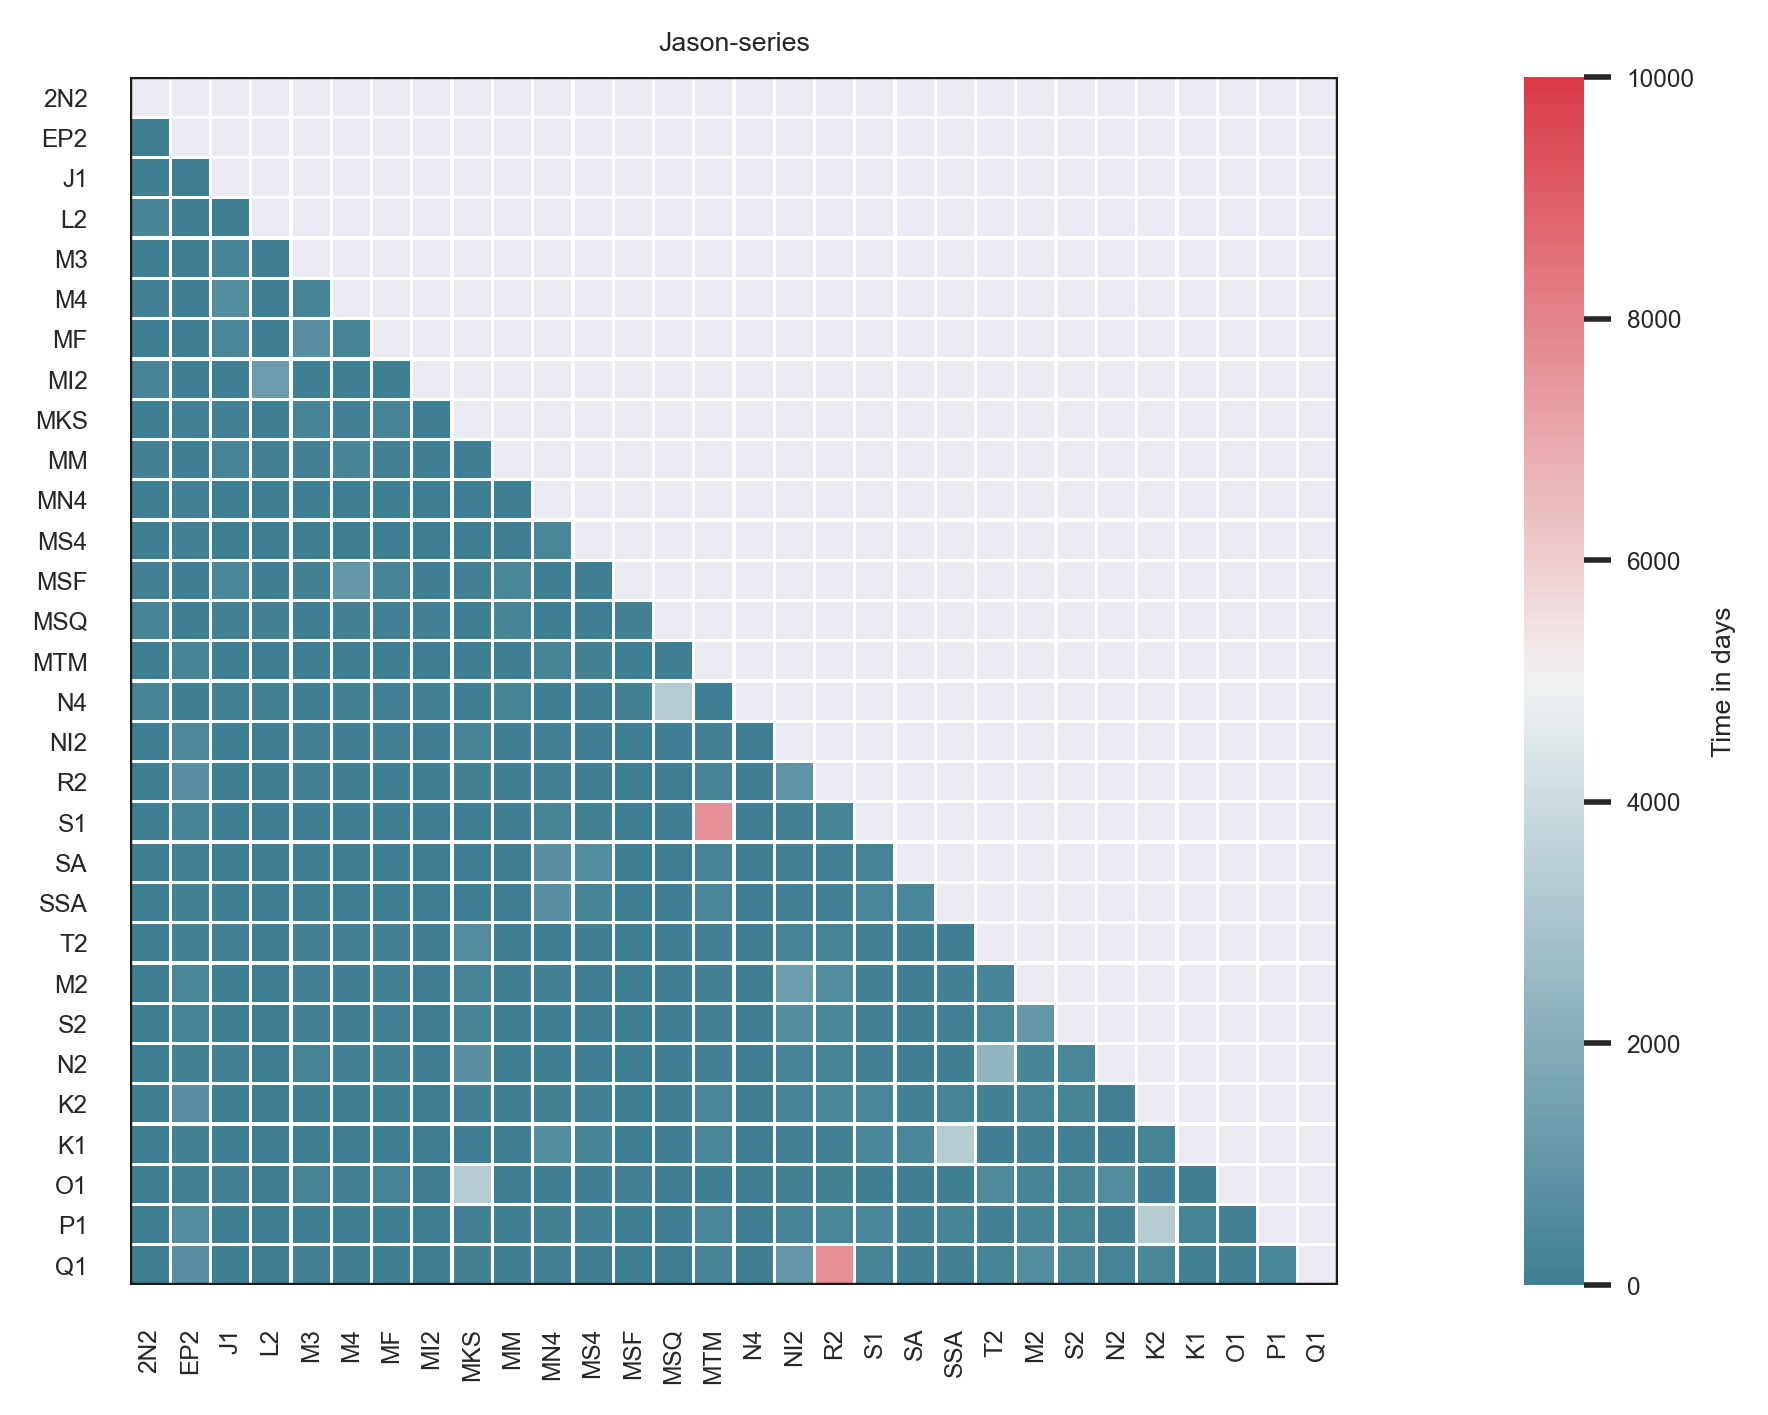

In [10]:
sns.set_style("darkgrid")
sns.set(font_scale=0.5)
letters = string.ascii_letters

d = pd.DataFrame(Ry_J)
# Compute the correlation matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(15,5),dpi=320)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True,center='light')

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(d, mask=mask, cmap=cmap, vmax=10000, vmin = 0 , 
            square=True,linewidths=.5, cbar_kws={"label": 'Time in days'}, ax=ax,
                 xticklabels=constituent,yticklabels=constituent,cbar=True,)

ax.set_title("Jason-series")
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=d.shape[1], color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=d.shape[0], color='k',linewidth=1)

plt.savefig("/Users/michaelhart-davis/Documents/GitHub/eot20_tides/figures/Minor_Tide_Paper/rayleigh_js.png")

plt.show()

<ipython-input-16-ade9e298b155>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(d, dtype=np.bool)
<ipython-input-16-ade9e298b155>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(d, dtype=np.bool)


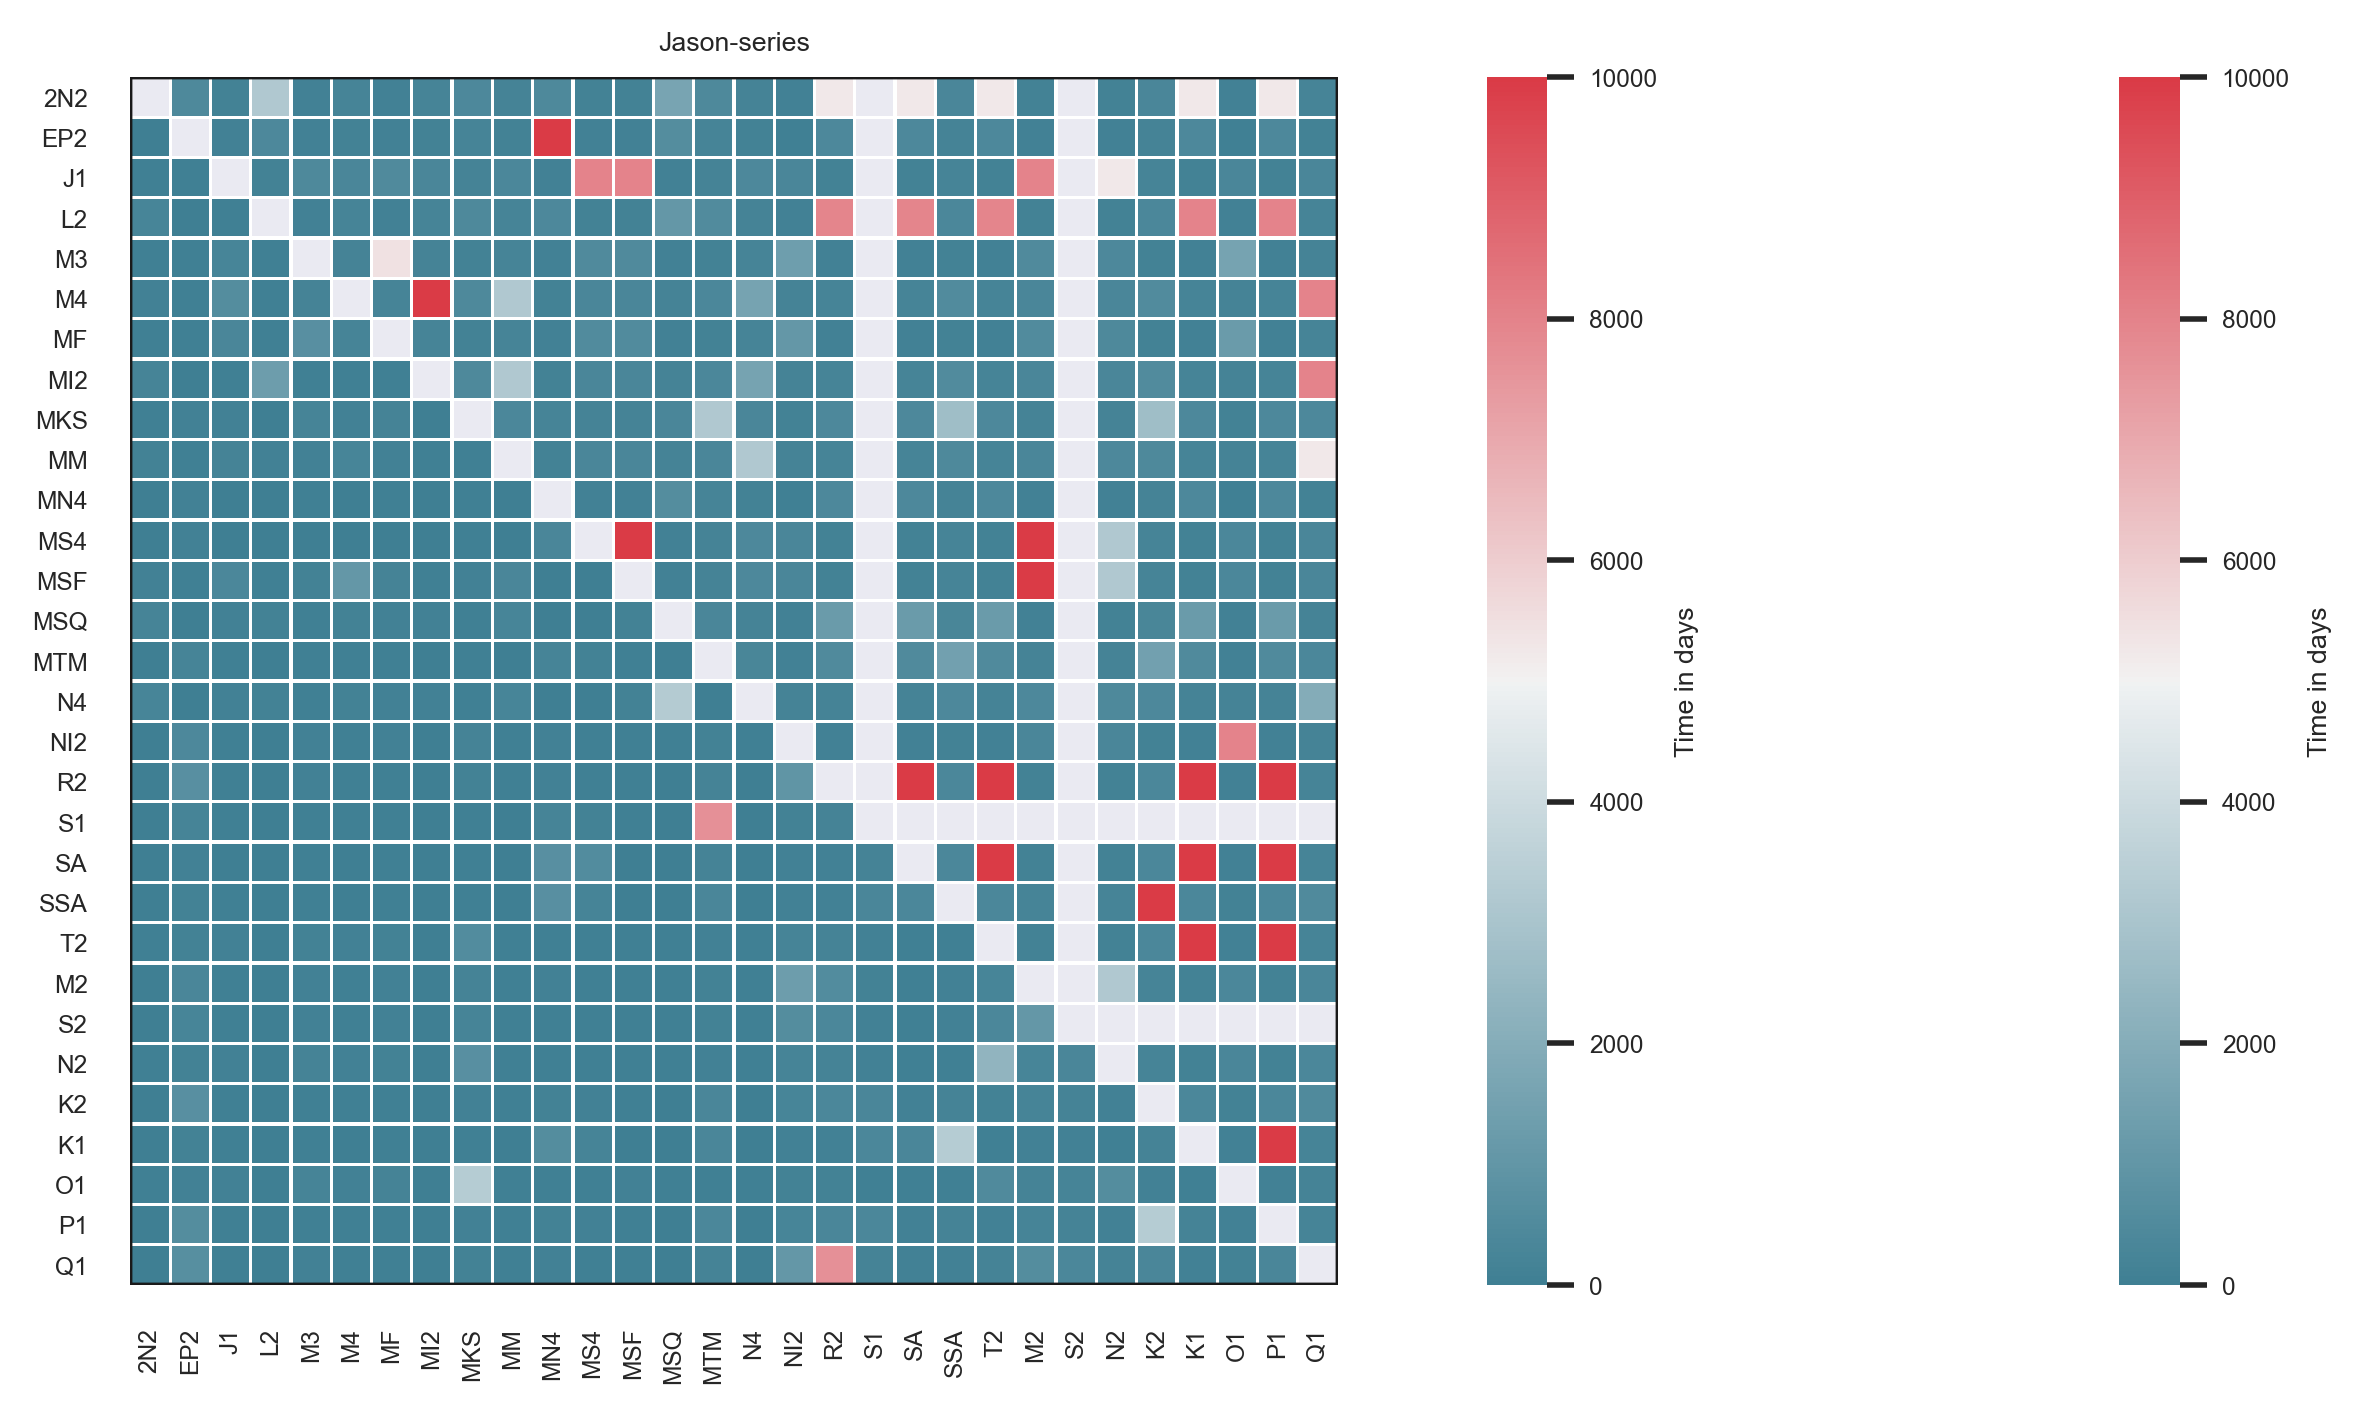

In [16]:
sns.set_style("darkgrid")
letters = string.ascii_letters
sns.set(font_scale=0.5)

d = pd.DataFrame(Ry_E)
# Compute the correlation matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(15,5),dpi=320)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True,center='light')

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(d, mask=mask, cmap=cmap, vmax=10000, vmin = 0 , 
            square=True,linewidths=.5, cbar_kws={"label": 'Time in days'}, ax=ax,
                 xticklabels=constituent,yticklabels=constituent,cbar=True,)

ax.set_title("Envisat-series")

ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=d.shape[1], color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=d.shape[0], color='k',linewidth=1)

# plt.savefig("/Users/michaelhart-davis/Documents/GitHub/eot20_tides/figures/Minor_Tide_Paper/rayleigh_en.png")

plt.show()

<ipython-input-24-9ea0410c8424>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(d, dtype=np.bool)
<ipython-input-24-9ea0410c8424>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(d, dtype=np.bool)


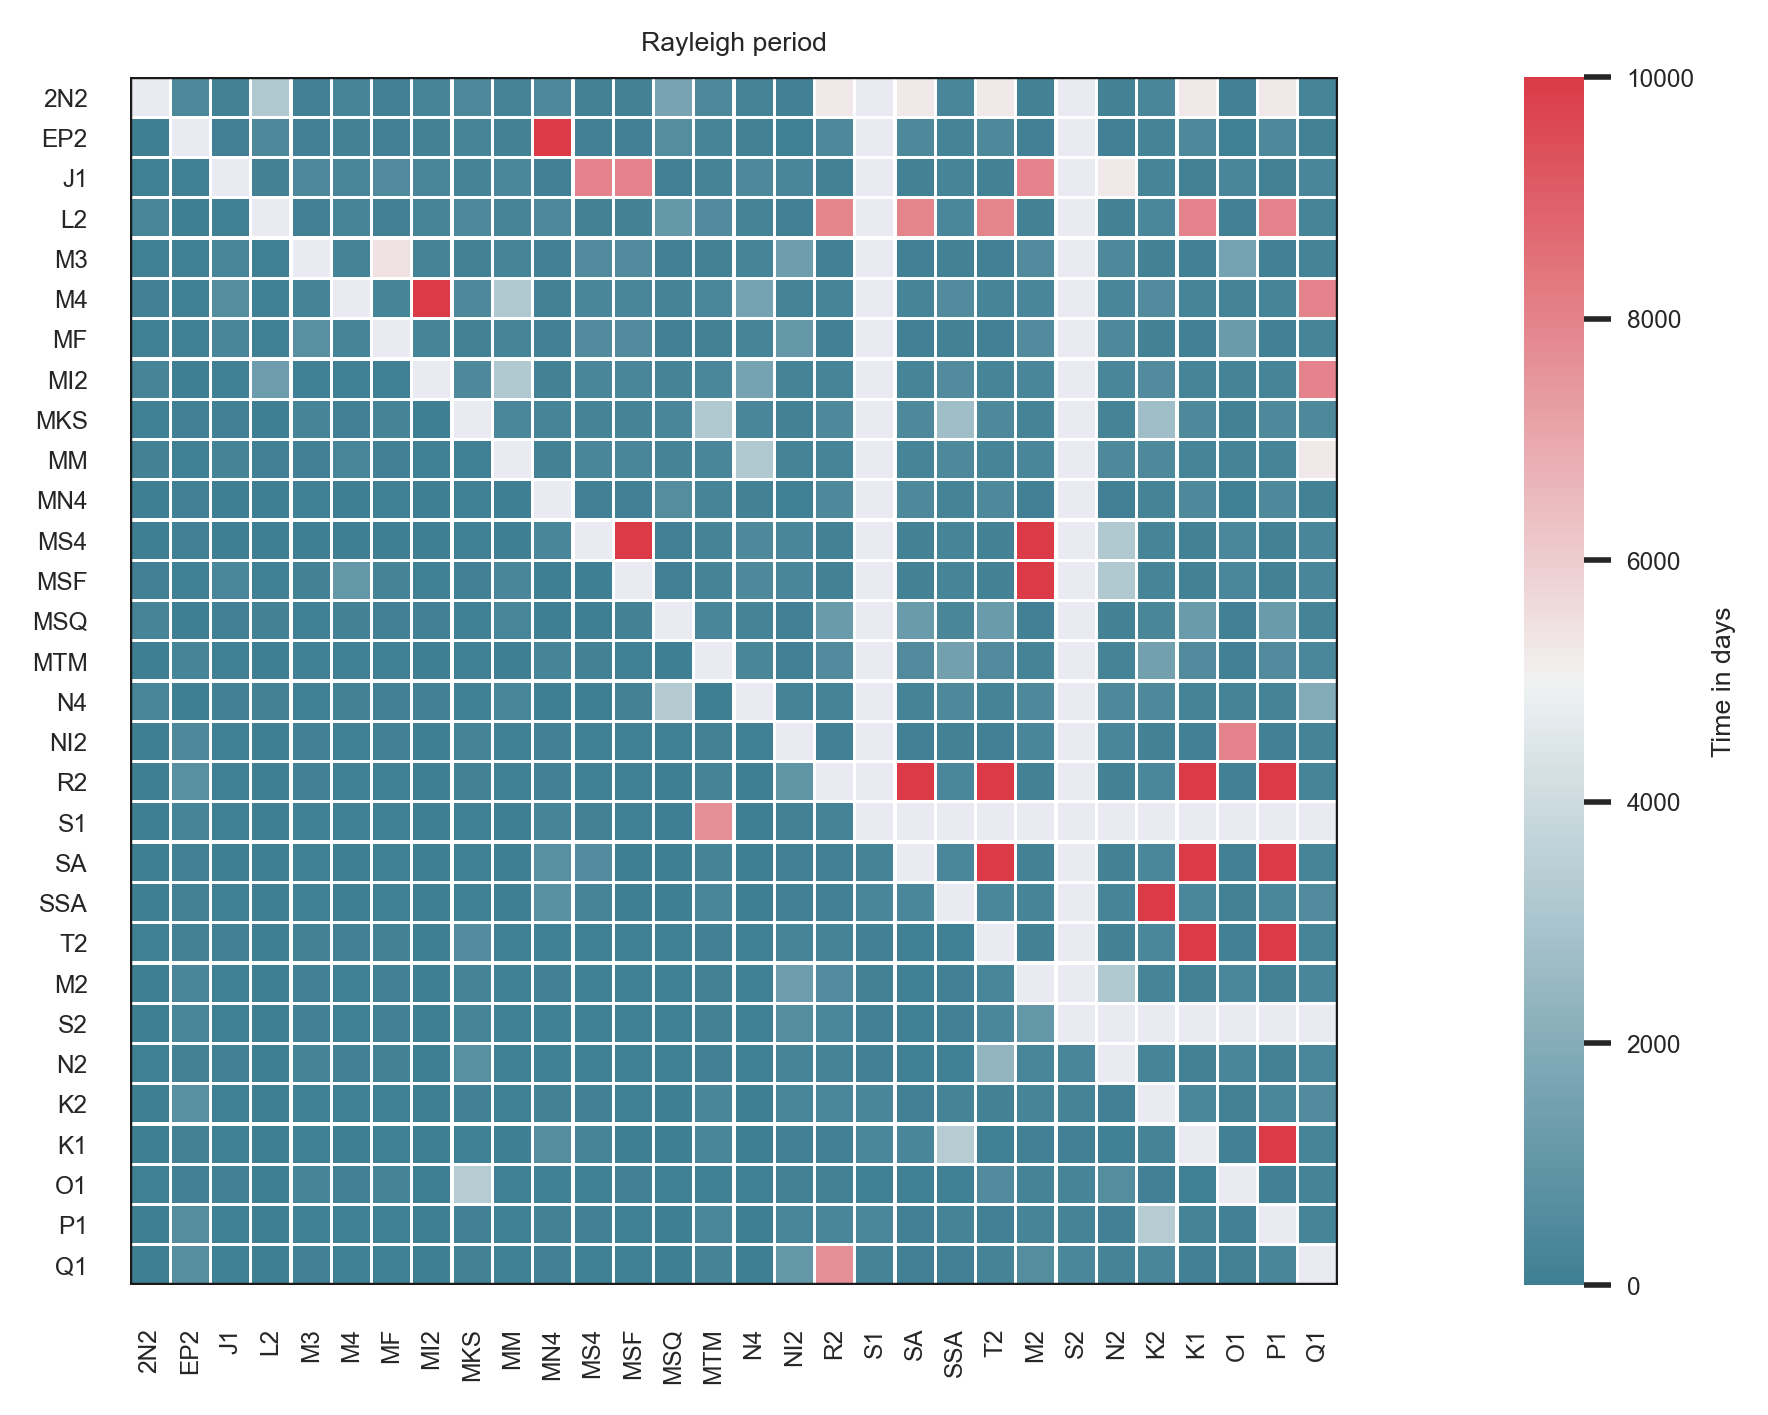

In [24]:
sns.set_style("darkgrid")
letters = string.ascii_letters
sns.set(font_scale=0.5)

d = pd.DataFrame(Ry_E)
# Compute the correlation matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False

# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(15,5),dpi=320)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True,center='light')

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(d, mask=mask, cmap=cmap, vmax=10000, vmin = 0 , 
            square=True,linewidths=.5, cbar_kws={"label": 'Time in days'}, ax=ax,
                 xticklabels=constituent,yticklabels=constituent,cbar=True,)

ax.set_title("Rayleigh period")

ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=d.shape[1], color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=d.shape[0], color='k',linewidth=1)

d = pd.DataFrame(Ry_J)

mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(d, mask=mask, cmap=cmap, vmax=10000, vmin = 0 , 
            square=True,linewidths=.5, cbar_kws={"label": 'Time in days'}, ax=ax,
                 xticklabels=constituent,yticklabels=constituent,cbar=False,)

plt.savefig("/Users/michaelhart-davis/Documents/GitHub/eot20_tides/figures/Minor_Tide_Paper/rayleigh_both.png")

plt.show()